# Nifty-50 (NSEI) DATA ANALYSIS

Historical data of the Nifty 50 index is an essential financial instrument for many investors and analysts. It provides valuable insights into the past performance of the index, allowing for trend analysis, pattern recognition, and the development of trading strategies.
This data typically includes daily, weekly, or monthly price information, as well as volume traded, open, high, low, and close prices for each time period.


# Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn
import statsmodels.api as sm
import datetime as dt

# Importing Nifty-50 dataset
Dataset from May 2009- May 2024 is used of National Stock Exchange of India (NSEI), the leading stock exchange of India

In [5]:
df = pd.read_csv('/home/hp/Desktop/github_gssoc/^NSEI.csv')


In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-05-12,3554.649902,3691.649902,3534.199951,3681.100098,3681.100098,0.0
1,2009-05-13,3668.750000,3709.600098,3610.199951,3635.250000,3635.250000,0.0
2,2009-05-14,3631.899902,3631.899902,3537.600098,3593.449951,3593.449951,0.0
3,2009-05-15,3597.850098,3686.250000,3597.850098,3671.649902,3671.649902,0.0
4,2009-05-18,3673.149902,4384.299805,3673.149902,4323.149902,4323.149902,0.0


In [7]:
data_types = df.dtypes

In [8]:
print(data_types)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object


# Data Cleaning and Initial Exploration

In [9]:
df = df.dropna()

In [10]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3681.000000,3681.000000,3681.000000,3681.000000,3681.000000,3.681000e+03
mean,10134.996049,10186.153749,10068.158183,10128.536203,10128.536203,2.231160e+05
std,4796.005014,4810.427223,4773.037874,4792.914078,4792.914078,2.100143e+05
min,3554.649902,3631.899902,3534.199951,3593.449951,3593.449951,0.000000e+00
25%,5900.200195,5927.299805,5863.950195,5898.850098,5898.850098,0.000000e+00
50%,8711.200195,8745.799805,8645.650391,8706.400391,8706.400391,1.897000e+05
75%,12026.400391,12068.599609,11946.849609,12012.049805,12012.049805,2.954000e+05
max,22766.349609,22794.699219,22673.699219,22753.800781,22753.800781,1.811000e+06


In [11]:
df.shape

(3681, 7)

<Axes: xlabel='Date'>

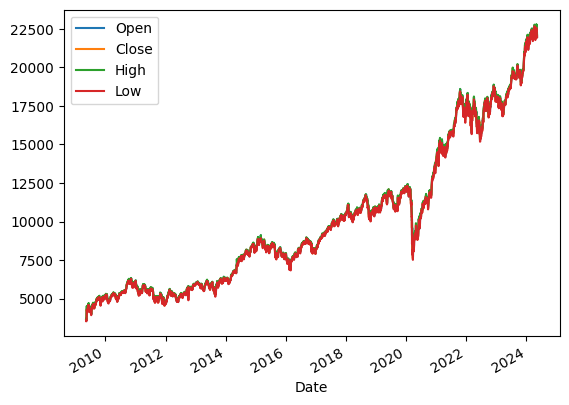

In [12]:
# Convert to DateTime
df['Date'] = pd.to_datetime(df['Date'])

# Set date as index
df.set_index('Date', inplace=True)

# Plot time series
df[['Open', 'Close', 'High', 'Low']].plot()

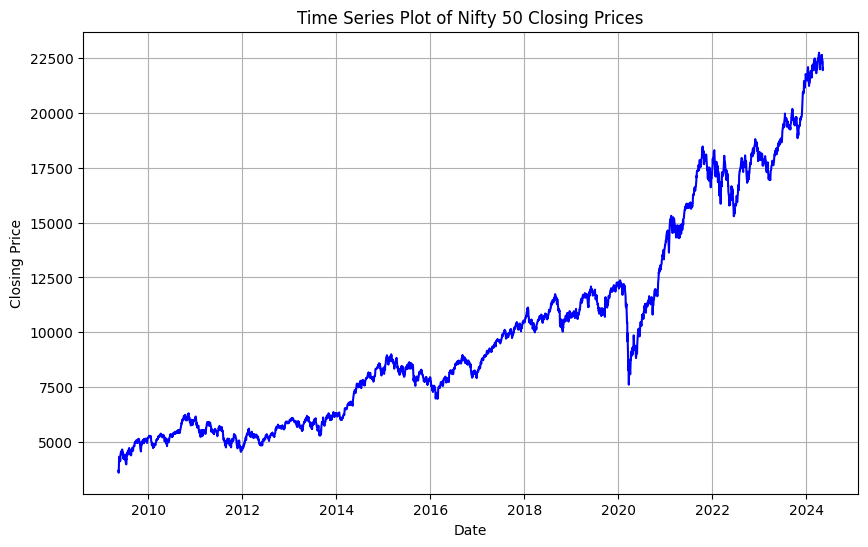

In [32]:
# Plot time series of closing prices
plt.figure(figsize=(10, 6))
plt.plot(df['Close'], color='blue')
plt.title('Time Series Plot of Nifty 50 Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()


# Time Series Forecasting


In [33]:
# Fit ARIMA model
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['Close'], order=(5, 1, 0))
model_fit = model.fit()
print(model_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3681
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -22445.923
Date:                Thu, 16 May 2024   AIC                          44903.846
Time:                        02:47:49   BIC                          44941.110
Sample:                             0   HQIC                         44917.112
                               - 3681                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0221      0.010      2.292      0.022       0.003       0.041
ar.L2          0.0098      0.009      1.141      0.254      -0.007       0.027
ar.L3         -0.0225      0.010     -2.299      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


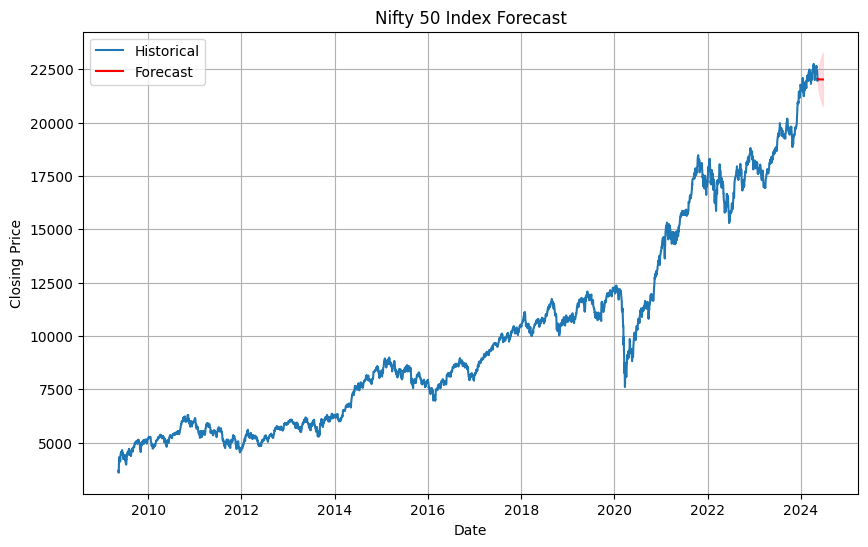

In [36]:
# Forecasting
forecast_steps = 30  # Number of days to forecast
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=df.index[-1], periods=forecast_steps+1, freq='B')[1:]  # Business days

# Extract forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(df['Close'], label='Historical')
plt.plot(forecast_index, forecast_values, label='Forecast', color='red')
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.5)
plt.title('Nifty 50 Index Forecast')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()


# Model Evaluation

In [37]:
# Evaluate the model
from sklearn.metrics import mean_squared_error

train_size = int(len(df) * 0.8)
train, test = df['Close'][:train_size], df['Close'][train_size:]
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

# Forecasting for the test set
forecast = model_fit.get_forecast(steps=len(test))
forecast_values = forecast.predicted_mean

# Calculate error
error = mean_squared_error(test, forecast_values)
print(f'Test MSE: {error:.3f}')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Test MSE: 13360090.524


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


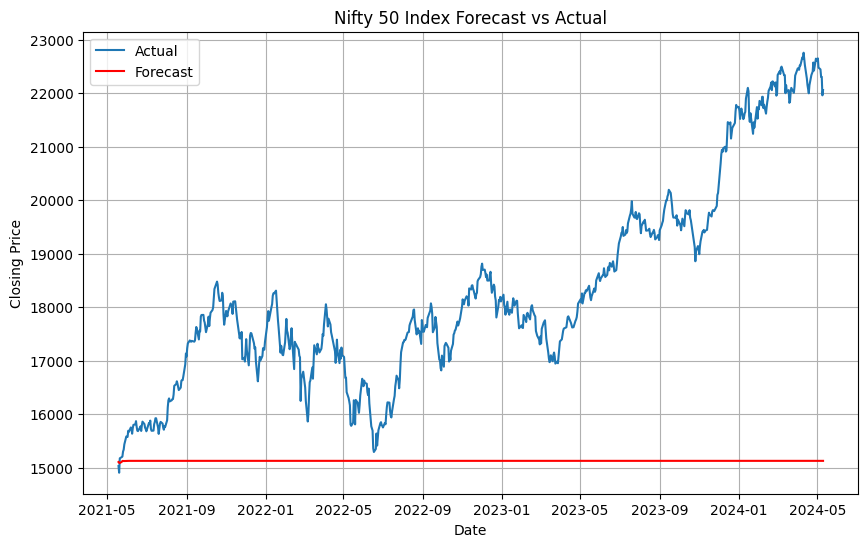

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast_values, label='Forecast', color='red')
plt.title('Nifty 50 Index Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()


# Trend Analysis

<Axes: xlabel='Date'>

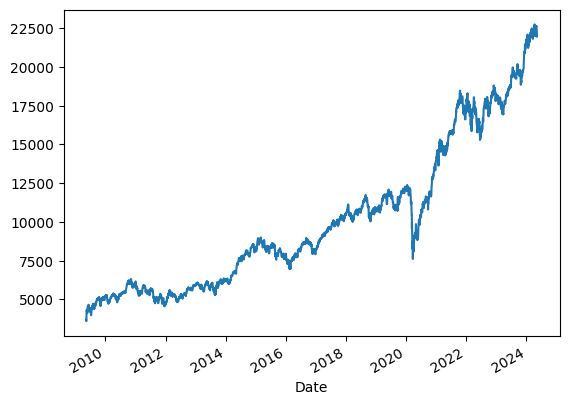

In [13]:
# Identify trends daily basis
df['Close'].rolling(window=1).mean().plot()

<Axes: xlabel='Date'>

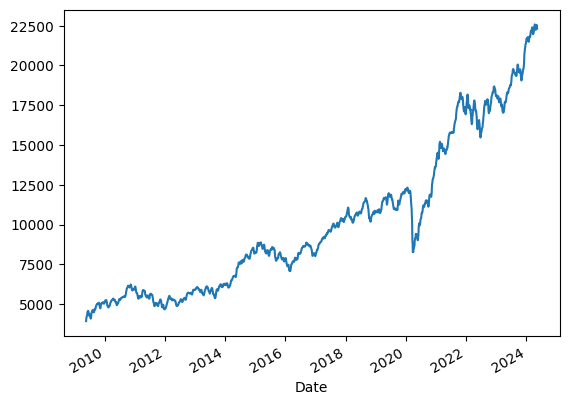

In [14]:
# Identify trends weekly basis
df['Close'].rolling(window=7).mean().plot() # 7-day moving average

<Axes: xlabel='Date'>

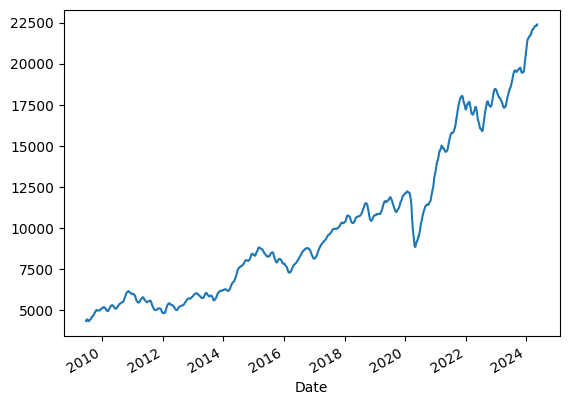

In [15]:
# Identify trends monthly basis
df['Close'].rolling(window=30).mean().plot()

# Calculating RSI and MACD and plotting their charts alongside the daily stock action¶


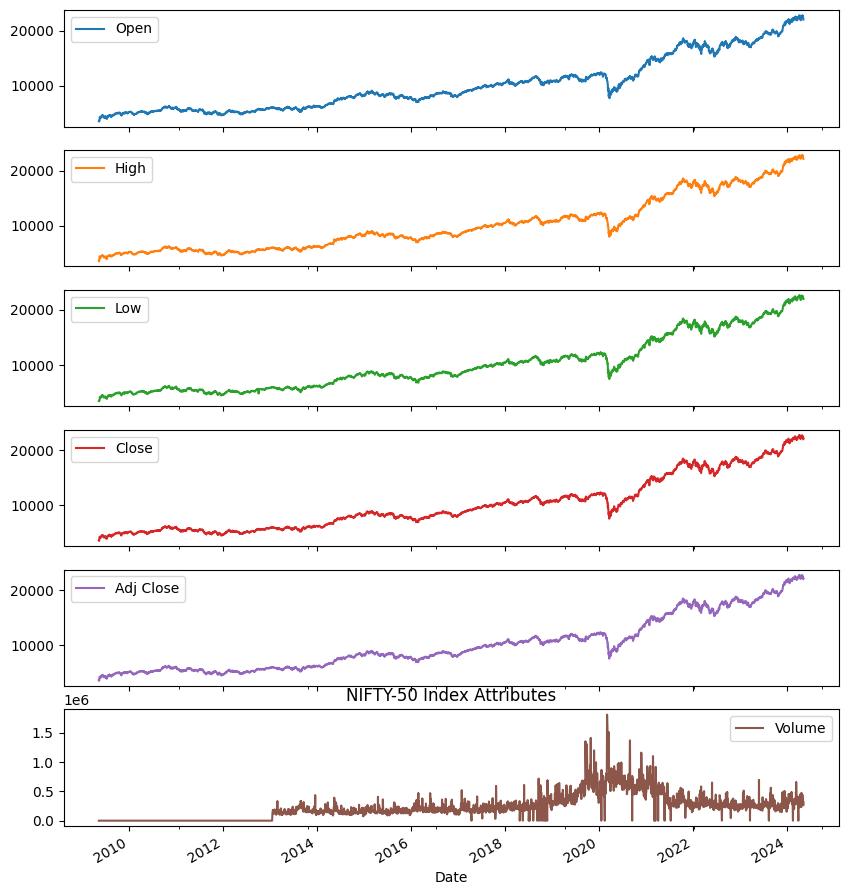

In [16]:
df.plot(subplots = True, figsize = (10,12))
plt.title('NIFTY-50 Index Attributes')
plt.show()

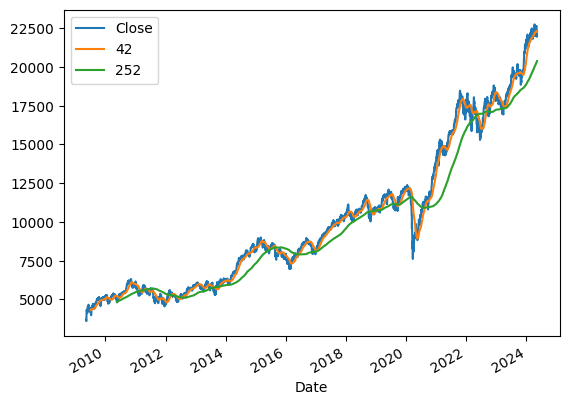

In [17]:
#Isolate the adjusted closing prices
adj_close_px = df['Close']

# Calculate the moving average
moving_avg = adj_close_px.rolling(window=40).mean()

# Inspect the result
moving_avg[-10:]


# Short moving window rolling mean
df['42'] = adj_close_px.rolling(window=40).mean()

# Long moving window rolling mean
df['252'] = adj_close_px.rolling(window=252).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
df[['Close', '42', '252']].plot()

plt.show()

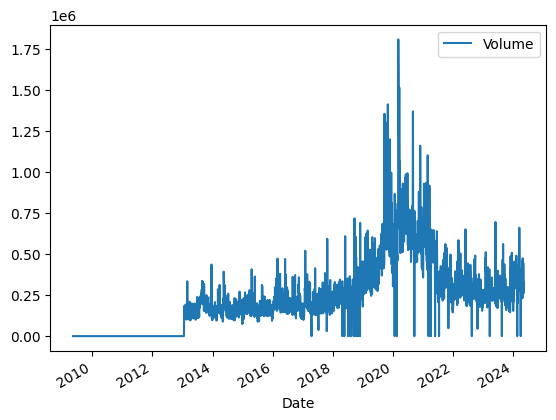

In [18]:
# Relationship between volume and price
df.plot(y='Volume', use_index=True)

# High volume days
high_volume_days = df[df['Volume'] > df['Volume'].quantile(0.95)]

In [19]:
df['daily_return'] = df['Close'].pct_change() * 100

<Axes: >

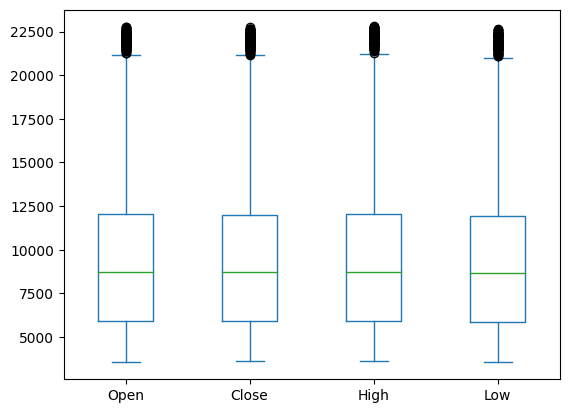

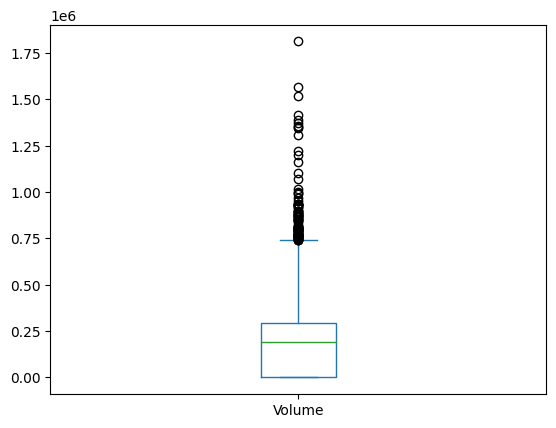

In [20]:
# Box plot
df[['Open', 'Close', 'High', 'Low']].plot(kind='box')

df[['Volume']].plot(kind='box')

Text(0.5, 1.0, 'Stock Prices Over Time')

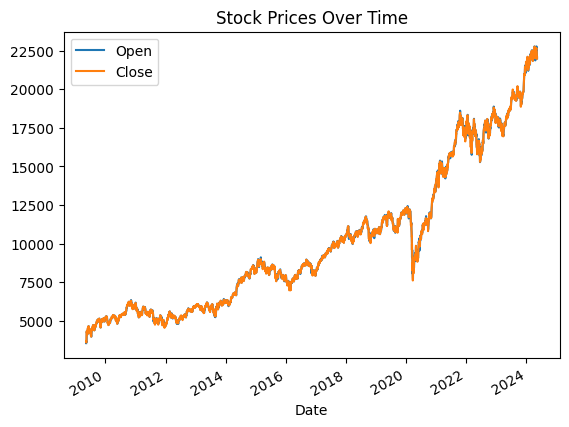

In [21]:
# Time series plot
df[['Open', 'Close']].plot()
plt.title('Stock Prices Over Time')

<Axes: xlabel='Open', ylabel='Close'>

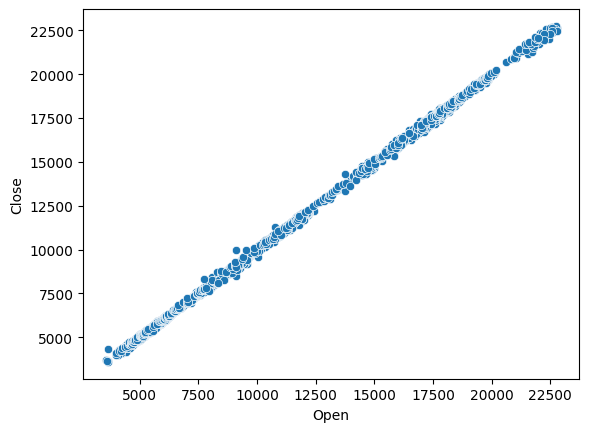

In [22]:
# Scatter plot for correlation
sns.scatterplot(data=df, x='Open', y='Close')

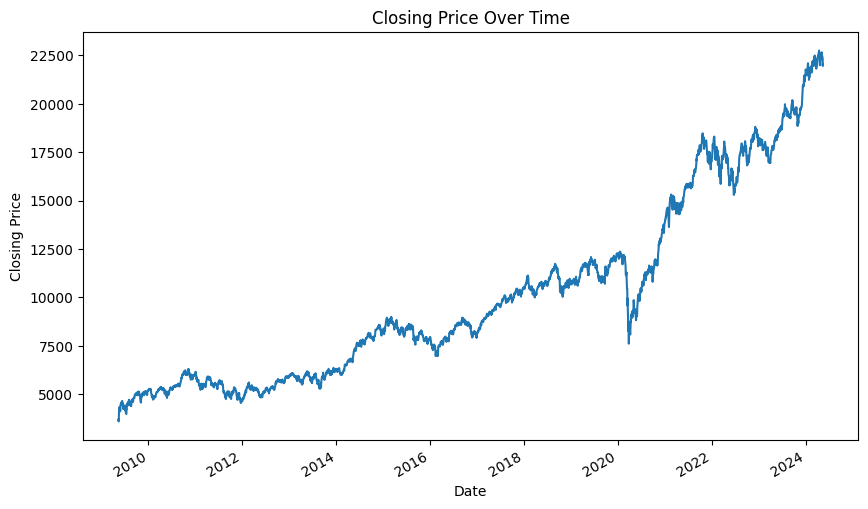

In [23]:
# Plotting closing prices
df['Close'].plot(figsize=(10, 6))
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

# Moving averages (MA)
Below code is for MA on a single graph using Matplotlib. This will add columns to the DataFrame for each moving average and then attempt to plot the 'Close' price along with these moving averages.

<Axes: xlabel='Date'>

<Figure size 4000x4500 with 0 Axes>

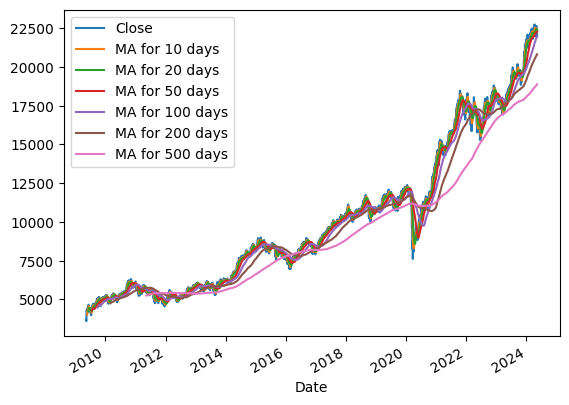

In [24]:
ma_day = [10, 20, 50, 100, 200, 500]

for ma in ma_day:
    column_name = f"MA for {ma} days"
    df[column_name] = df['Close'].rolling(ma).mean()


fig = plt. figure(figsize=(40,45))
df[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'MA for 100 days', 'MA for 200 days', 'MA for 500 days']].plot()

<Axes: xlabel='Date'>

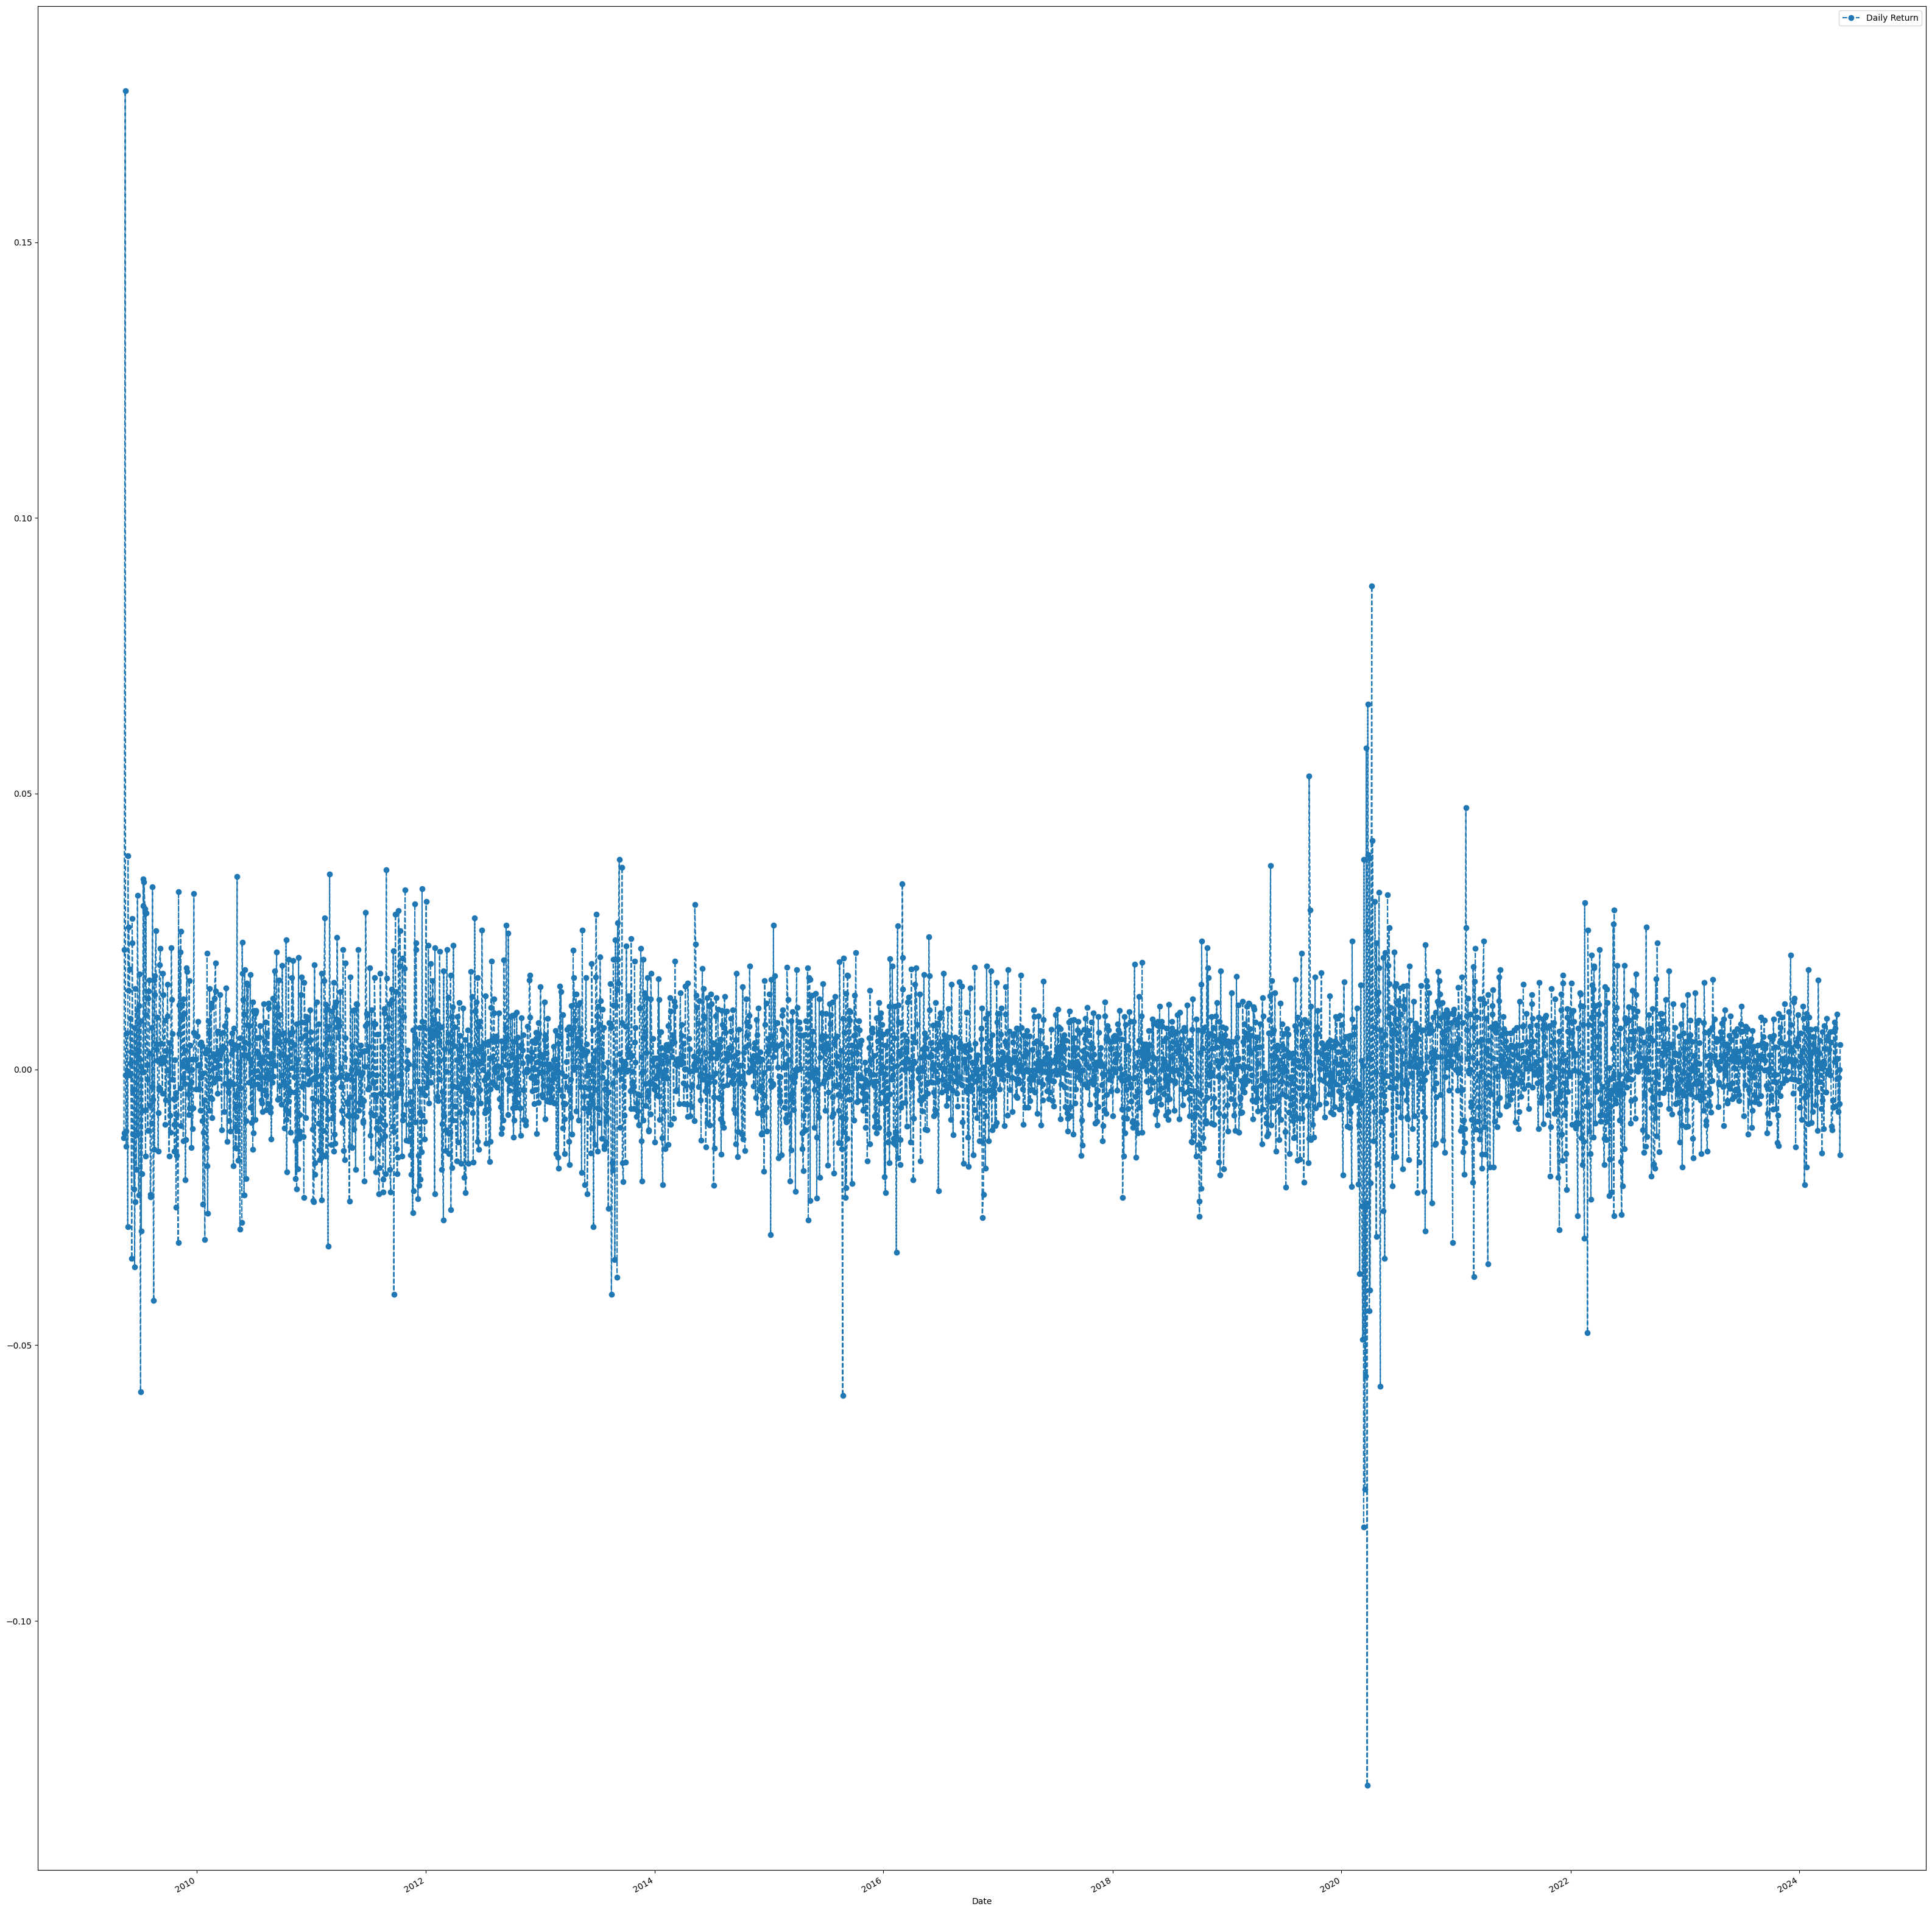

In [25]:
df['Daily Return'] = df['Close'].pct_change()
fig = plt. figure(figsize=(40,45))
df['Daily Return'].plot(legend=True, linestyle='--', marker='o')

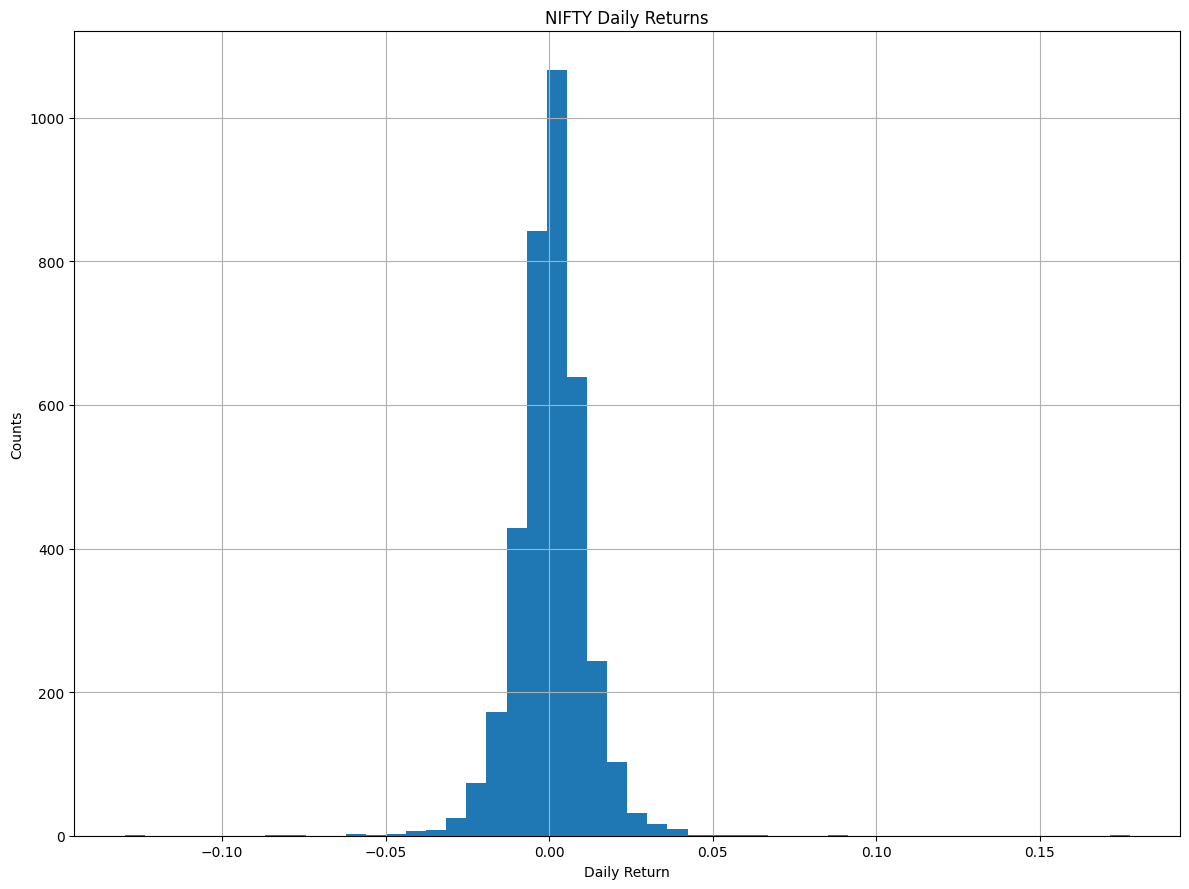

In [26]:
plt.figure(figsize=(12, 9))

df['Daily Return'].hist(bins=50)
plt.xlabel('Daily Return')
plt.ylabel('Counts')
plt.title(f'NIFTY Daily Returns')

plt.tight_layout()

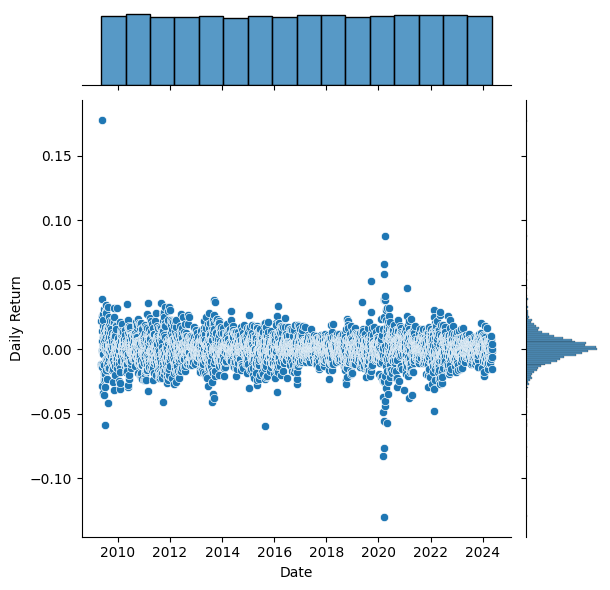

In [27]:
sns.jointplot(y='Daily Return', x='Date', data=df, kind='scatter')

<Axes: >

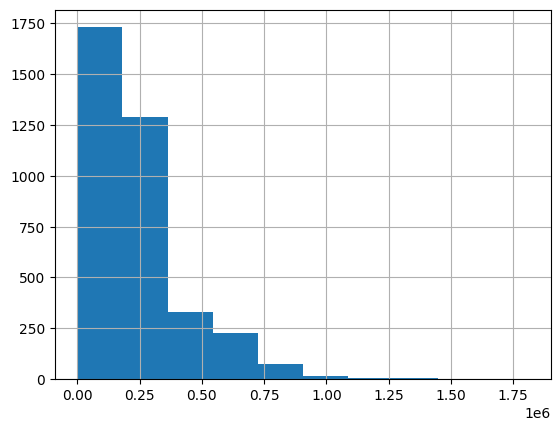

In [28]:
# Histogram
df['Volume'].hist()

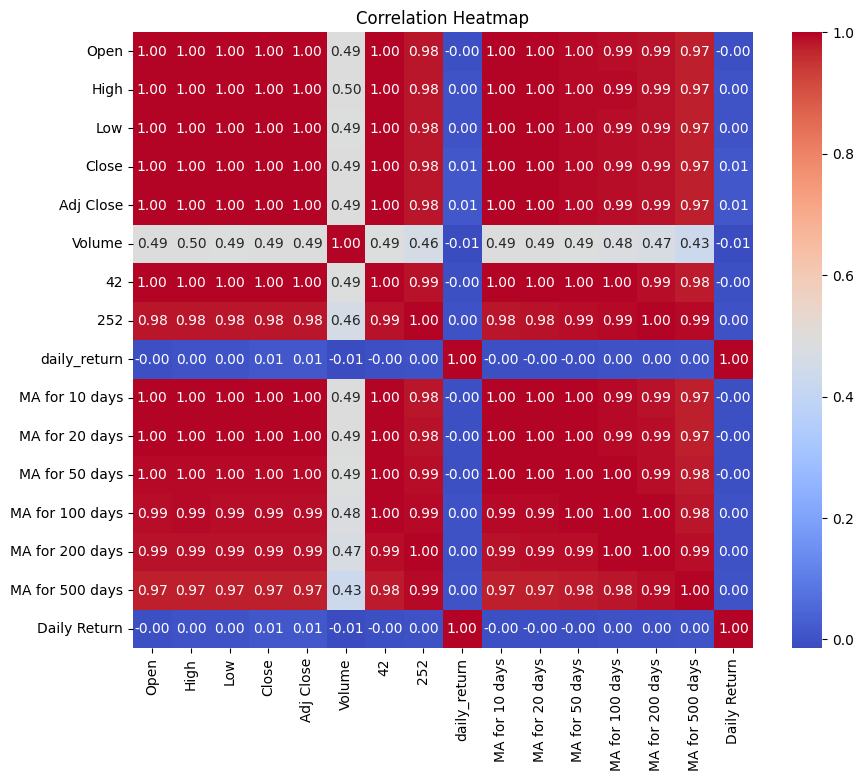

In [29]:
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Volatility Analysis
You can measure the level of volatility in the Nifty 50 index using various indicators such as standard deviation, average true range (ATR), or historical volatility.

In [30]:
nifty_close_prices = df['Close']
nifty_volatility_std = nifty_close_prices.std()
print("Nifty 50 Volatility (Standard Deviation):", nifty_volatility_std)

Nifty 50 Volatility (Standard Deviation): 4792.914078455333


In [31]:
# Calculate historical volatility using standard deviation of returns
nifty_daily_returns = df['Close'].pct_change().dropna()  # Calculate daily returns
nifty_volatility_hist = nifty_daily_returns.std() * 100  # Multiply by 100 to express in percentage
print("Nifty 50 Volatility (Historical Volatility):", nifty_volatility_hist)

Nifty 50 Volatility (Historical Volatility): 1.1284463450069575
